<a href="https://colab.research.google.com/github/MaruthiMax/INFO-5731_SPRING2024/blob/main/Lingampalli_maruthi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here

#import the necessary libraries belwo
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

#Every n-gram in a given token is counted once by this function

def ngram_counter(token, num):
    ngram = list_ngram(token, num)
    return Counter(ngram)

#This function takes a token and outputs a list of n-grams.

def list_ngram(token, num):
    return list(ngrams(token, num))


#This function utilises the regular expression parser in NLTK to generate tokens and tag the submitted text,
#then extracts / returns noun phrases that are that fit an assumed grammatical pattern

def n_phrase(a):
    token_in = word_tokenize(a)
    token_tags = nltk.pos_tag(token_in)
    token_grammar = "NP: {<DT>?<JJ>*<NN>}"
    com = nltk.RegexpParser(token_grammar)
    tree_word = com.parse(token_tags)

    noun_list = []
    for b in tree_word.subtrees():
        if b.label() == 'NP':
            noun_list.append(' '.join(word for word, tag in b.leaves()))

    return noun_list

#This function combines the average number of bigrams and
#the initial unigrams to figure out and provide the conditional odds of the bigrams in an individual token

def prob_bigram(token):
    gbi = list_ngram(token, 2)
    unig = token
    count_bi = Counter(gbi)
    count_uni = Counter(unig)

    p_bi = {}

    for n in count_bi:
        a, b = n
        prob = count_bi[n] / count_uni[a]
        p_bi[n] = prob

    return p_bi

#The objective of this task is to identify the overall frequency for every phrase
# by quantifying the degree to which at which brief words happen across various text sections

def relv_prob(dataset):
    n_phrase_all = []
    npharese_rew = []

    for r in dataset:
        noun_list= n_phrase(r)
        npharese_rew.append(Counter(noun_list))
        n_phrase_all.extend(noun_list)

    frequency_max = Counter(n_phrase_all)

    relative_probabilty = []
    for g in npharese_rew:
        relative_probabilty.append({
            np: g[np] / frequency_max[np] if frequency_max[np] != 0 else 0
            for np in g
        })

    return relative_probabilty



# load the data file
with open('/content/cleaned_reviews_of_jigarthanda.csv', 'r', encoding='utf-8') as f:
    dataset= f.readlines()

# Tokenize the dataset
data_tokens = [word_tokenize(review) for review in dataset]

# Count the frequency of all the N-grams (N=3)
tag_counts = ngram_counter([tuple(review) for review in data_tokens], 3)
print(" Trigrams count freq are:")
print(tag_counts)

# Calculate the probabilities for all the bigrams
bi_gram__probability = prob_bigram([w for review in data_tokens for w in review])
print("\n The Probabilities of bigrams are:")
print(bi_gram__probability)

# Extract all the noun phrases and calculate relative probabilities
relative_probability_ = relv_prob(dataset)
dataframe_ = pd.DataFrame(relative_probability_)
dataframe_ = dataframe_.fillna(0)  # Fill NaN values with 0 for better presentation
print("\nNoun Phrases relative probabilities :")
print(dataframe_)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


 Trigrams count freq are:
Counter({(('``', 'We', "'ve", 'had', 'some', 'banger', 'movies', 'out', 'of', 'Kollywood', 'in', '2023', ',', 'and', 'this', 'just', 'might', 'be', 'my', 'Tamil', 'movie', 'of', 'the', 'year', '.', 'I', 'was', 'skeptical', 'of', 'a', 'Jigarthanda', "'sequel", "'", 'when', 'this', 'was', 'announced', 'and', 'was', "n't", 'sure', 'what', 'to', 'make', 'of', 'the', 'casting', ',', 'but', 'was', 'blown', 'away', 'by', 'what', 'I', 'watched.You', 'can', 'write', 'a', 'story', 'about', 'a', 'given', 'topic/around', 'a', 'message', ',', 'and', 'a', 'good', 'story', 'should', 'be', 'enough', 'for', 'the', 'film', '.', 'Making', 'a', 'movie', 'about', 'making', 'movie', 'about', 'the', 'same', 'story', 'could', 'almost', 'feel', '...', "''", "''", 'Why', '?', 'Keep', 'it', 'simple', '&', 'not', 'complicate', 'the', 'plot', '.', 'Just', 'make', 'it', 'about', 'the', 'message', '.', "''", "''", 'But', 'no', ',', 'JDX', 'disagrees', '.', 'It', 'want', "'s", 'to', 'do', 'w

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
df = pd.read_csv('100_reviews.csv')
df_col = df['cleaned_review']
# query
query = "weve banger movi kollywood might tamil movi year skeptic jigarthanda sequel announc wasnt sure make cast blown away watchedy write stori given topicaround messag good stori enough film make movi make movi stori could almost feelwhi keep simpl complic plot make messag jdx disagre want what toughwritingdirect easili best work ive seen recent time movi mani layer written seamlessli enjoy first film even though didnt like transit tonegenr knew jdx would damn didnt expect use cinema bring forth chang way love went back forth shoot mean differ peopl film didnt expect messag hardhit yet onthenos didnt think could blend genr way didraghava lawrenc role lifetim often steal show sj surya also realli good guy manag youv got watch believ support cast realli goodmus santhosh narayanan work elev almost everi scene film beyond expect especi one suppos hit hard refresh listen genr music continu bombard anirudh song sung mostli heroworshipingcinematographi especi first half top notch light color deserv special mention bum nd half didnt look vibrant understand done wayi could go specif would potenti spoil thing yousooodont miss film id surpris doesnt win bunch award next year base technic epic film commentari variou thing simpli base well tell stori power cinema cinema would top indian film submit oscar know havent watch mani good indian movi year boy sent film dont think id disagre one bit"

text=pd.concat([df_col, pd.Series([query])], ignore_index=True)

vectoriser = TfidfVectorizer()
tf_idf = vectoriser.fit_transform(text)

cos_similar = cosine_similarity(tf_idf[-1], tf_idf[:-1])

score_text = list(enumerate(cos_similar[0]))
sorted_text = sorted(score_text, key=lambda x: x[1], reverse=True)

#Printing the matrix
print("number of terms are \t", "\t".join(["Document Number is :" + str(i + 1) for i in range(len(df_col))] + ["Query"]))
term_freq = vectoriser.get_feature_names_out()
for i in range(len(term_freq)):
    print(term_freq[i], end="\t")
    for j in range(len(text)):
        print(f"{tf_idf[j, i]:.4f}", end="\t")
    print()

print("\nThe Given Query is:", query)
print("\nThe Documents  are based on rank :")
for ind, s in sorted_text:
    print(f"Document Number is : {ind + 1}: Similarity Score = {s:.4f}")
    print(f"   {df_col[ind]}")







number of terms are 	 Document Number is :1	Document Number is :2	Document Number is :3	Document Number is :4	Document Number is :5	Document Number is :6	Document Number is :7	Document Number is :8	Document Number is :9	Document Number is :10	Document Number is :11	Document Number is :12	Document Number is :13	Document Number is :14	Document Number is :15	Document Number is :16	Document Number is :17	Document Number is :18	Document Number is :19	Document Number is :20	Document Number is :21	Document Number is :22	Document Number is :23	Document Number is :24	Document Number is :25	Document Number is :26	Document Number is :27	Document Number is :28	Document Number is :29	Document Number is :30	Document Number is :31	Document Number is :32	Document Number is :33	Document Number is :34	Document Number is :35	Document Number is :36	Document Number is :37	Document Number is :38	Document Number is :39	Document Number is :40	Document Number is :41	Document Number is :42	Document Number is :4

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

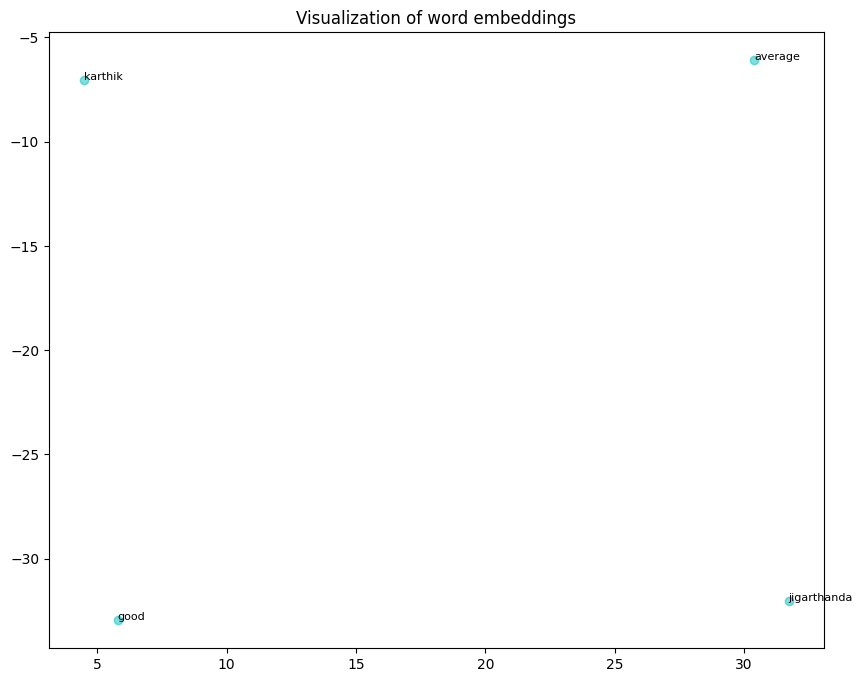

In [ ]:
# Write your code here
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/cleaned_reviews_of_jigarthanda.csv')


corpus_text = [str(r).split() for r in df['cleaned_review']]

vector_model = Word2Vec(sentences=corpus_text, vector_size=300, window=5, min_count=1, workers=4)
vector_model.save("vector_model.bin")
#by using t-SNE we are visualizing the word embeddings
def visualize_model(vector_model, wrd):
    vector = np.array([vector_model.wv[wd] for wd in wrd if wd in vector_model.wv])

    perplex = min(5, len(vector)-1)
    t_val = TSNE(n_components=2, random_state=42, perplexity=perplex)
    t_vector= t_val.fit_transform(vector)

    plt.figure(figsize=(10,8))
    plt.scatter(t_vector[:, 0], t_vector[:, 1], marker='o', color='c', alpha=0.5)

    for index, word in enumerate(wrd):
        if index < len(t_vector):
            plt.annotate(word, xy=(t_vector[index, 0], t_vector[index, 1]), fontsize=8)

    plt.title("Visualization of word embeddings")
    plt.show()

vector_words = ["karthik","jigarthanda","good","average","fire","bad"]

visualize_model(vector_model,vector_words)





## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
# The GitHub link of your final csv file


# Link:https://github.com/MaruthiMax/INFO-5731_SPRING2024



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [4]:
# Type your answer


# Am learning new methods as topic modeling in this assignment it is really a
# and also it is  great expirence for me, but the most difficult part is most of the functions are already predefined so it is really hard fro me to cope with them. Apart from this its really a involving assignment #